In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
df = pd.read_csv("avocado.csv",  index_col=None, na_values=['NA'])

In [4]:
df.shape

(18249, 14)

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
remove_duplicate=df.drop_duplicates()#this will remove the duplicate rows.
print(remove_duplicate)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [9]:
df.columns = df.columns.str.upper() ##change columns to uppercase

In [10]:
df.columns

Index(['UNNAMED: 0', 'DATE', 'AVERAGEPRICE', 'TOTAL VOLUME', '4046', '4225',
       '4770', 'TOTAL BAGS', 'SMALL BAGS', 'LARGE BAGS', 'XLARGE BAGS', 'TYPE',
       'YEAR', 'REGION'],
      dtype='object')

In [11]:
df.isnull().any() ## check if anynull value exists

UNNAMED: 0      False
DATE            False
AVERAGEPRICE    False
TOTAL VOLUME    False
4046            False
4225            False
4770            False
TOTAL BAGS      False
SMALL BAGS      False
LARGE BAGS      False
XLARGE BAGS     False
TYPE            False
YEAR            False
REGION          False
dtype: bool

In [12]:
df.dtypes

UNNAMED: 0        int64
DATE             object
AVERAGEPRICE    float64
TOTAL VOLUME    float64
4046            float64
4225            float64
4770            float64
TOTAL BAGS      float64
SMALL BAGS      float64
LARGE BAGS      float64
XLARGE BAGS     float64
TYPE             object
YEAR              int64
REGION           object
dtype: object

In [13]:
corr_matrix = df.corr()  ##checking correlation with average price
corr_matrix["AVERAGEPRICE"].sort_values(ascending=False) 

AVERAGEPRICE    1.000000
YEAR            0.093197
XLARGE BAGS    -0.117592
UNNAMED: 0     -0.133008
4225           -0.172928
LARGE BAGS     -0.172940
SMALL BAGS     -0.174730
TOTAL BAGS     -0.177088
4770           -0.179446
TOTAL VOLUME   -0.192752
4046           -0.208317
Name: AVERAGEPRICE, dtype: float64

In [14]:
df.head()

,UNNAMED: 0,DATE,AVERAGEPRICE,TOTAL VOLUME,4046,4225,4770,TOTAL BAGS,SMALL BAGS,LARGE BAGS,XLARGE BAGS,TYPE,YEAR,REGION
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
df.columns

Index(['UNNAMED: 0', 'DATE', 'AVERAGEPRICE', 'TOTAL VOLUME', '4046', '4225',
       '4770', 'TOTAL BAGS', 'SMALL BAGS', 'LARGE BAGS', 'XLARGE BAGS', 'TYPE',
       'YEAR', 'REGION'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder ##convert label
le_type = LabelEncoder()
le_totalvolume = LabelEncoder()

In [17]:
df['type_n'] = le_type.fit_transform(df['TYPE'])
df['totalvolume_n'] = le_totalvolume.fit_transform(df['TOTAL VOLUME'])

In [18]:
df.head()

,UNNAMED: 0,DATE,AVERAGEPRICE,TOTAL VOLUME,4046,4225,4770,TOTAL BAGS,SMALL BAGS,LARGE BAGS,XLARGE BAGS,TYPE,YEAR,REGION,type_n,totalvolume_n
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0,7931
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0,7645
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0,9388
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0,8374
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,7540


In [19]:
inputs = df.drop(['DATE', 'UNNAMED: 0','TYPE', 'YEAR','REGION','TOTAL VOLUME'], axis ='columns')

In [20]:
target = inputs['AVERAGEPRICE']

In [21]:
target

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AVERAGEPRICE, Length: 18249, dtype: float64

In [22]:
inputs

,AVERAGEPRICE,4046,4225,4770,TOTAL BAGS,SMALL BAGS,LARGE BAGS,XLARGE BAGS,type_n,totalvolume_n
0,1.33,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,7931
1,1.35,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,7645
2,0.93,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,9388
3,1.08,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,8374
4,1.28,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,7540
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,5729
18245,1.71,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,5233
18246,1.87,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,5203
18247,1.93,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,5616


In [23]:
dataset = inputs.values

In [24]:
dataset

array([[1.3300000e+00, 1.0367400e+03, 5.4454850e+04, ..., 0.0000000e+00,
        0.0000000e+00, 7.9310000e+03],
       [1.3500000e+00, 6.7428000e+02, 4.4638810e+04, ..., 0.0000000e+00,
        0.0000000e+00, 7.6450000e+03],
       [9.3000000e-01, 7.9470000e+02, 1.0914967e+05, ..., 0.0000000e+00,
        0.0000000e+00, 9.3880000e+03],
       ...,
       [1.8700000e+00, 1.1919200e+03, 2.4527900e+03, ..., 0.0000000e+00,
        1.0000000e+00, 5.2030000e+03],
       [1.9300000e+00, 1.5276300e+03, 2.9810400e+03, ..., 0.0000000e+00,
        1.0000000e+00, 5.6160000e+03],
       [1.6200000e+00, 2.8947700e+03, 2.3561300e+03, ..., 0.0000000e+00,
        1.0000000e+00, 5.7890000e+03]])

In [25]:
X= dataset[:,0:10]
Y= dataset[:,0:10]

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [27]:
X_scale

array([[3.16725979e-01, 4.55837802e-05, 2.66015275e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.34908971e-01],
       [3.23843416e-01, 2.96470005e-05, 2.18063319e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.19225707e-01],
       [1.74377224e-01, 3.49416730e-05, 5.33202818e-03, ...,
        0.00000000e+00, 0.00000000e+00, 5.14805878e-01],
       ...,
       [5.08896797e-01, 5.24067937e-05, 1.19820293e-04, ...,
        0.00000000e+00, 1.00000000e+00, 2.85314762e-01],
       [5.30249110e-01, 6.71674191e-05, 1.45625628e-04, ...,
        0.00000000e+00, 1.00000000e+00, 3.07962272e-01],
       [4.19928826e-01, 1.27278353e-04, 1.15098392e-04, ...,
        0.00000000e+00, 1.00000000e+00, 3.17449002e-01]])

In [28]:
from sklearn.model_selection import train_test_split
# dataset split into two
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

# we want a separate validation set and test set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#X_train (10 input features, 70% of full dataset)
#X_val (10 input features, 15% of full dataset)
#X_test (10 input features, 15% of full dataset)
#Y_train (1 label, 70% of full dataset)
#Y_val (1 label, 15% of full dataset)
#Y_test (1 label, 15% of full dataset)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(12774, 10) (2737, 10) (2738, 10) (12774, 10) (2737, 10) (2738, 10)


In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train , Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
model.score(X_test, Y_test)

C:\Users\Pratima Parajuli\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9968520960535223

In [75]:
y_predicted = model.predict (X_test) ##making prediction

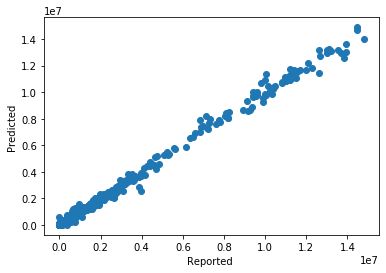

In [33]:
plt.scatter(Y_test, y_predicted)
plt.xlabel('Reported ')
plt.ylabel('Predicted')
plt.show()

In [71]:
from sklearn.tree import export_graphviz
from glob import glob
from IPython.display import display , Image 
%matplotlib inline


In [48]:
model.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1041782318, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=834669746, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2,

In [49]:
len(model.estimators_)

20

NameError: name 'graph' is not defined

In [56]:

for i in range (len(model.estimators_)):
    save_decision_trees_as_png(model.estimators_[i],i,X,Y)

NameError: name 'save_decision_trees_as_png' is not defined